# 서울시 범죄 현황 데이터 분석

In [266]:
import pandas as pd
import numpy as np

In [267]:
!pwd

/home/kang/dev_ws/EDA/SYC


In [268]:
crime_row_data = pd.read_csv('../data/02_seoul_crime_2016.csv', encoding ='cp949') # 통역사 encoding='cp949'도 사용가능
crime_row_data.head()

,구분,죄종,발생검거,건수
0,중부,살인,발생,2.0
1,중부,살인,검거,2.0
2,중부,강도,발생,3.0
3,중부,강도,검거,3.0
4,중부,강간,발생,141.0


In [269]:
## 02. 데이터 첫번째 전처리
# nill, nan, NaN, None  #누락값

In [270]:
crime_row_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65534 entries, 0 to 65533
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   구분      310 non-null    object 
 1   죄종      310 non-null    object 
 2   발생검거    310 non-null    object 
 3   건수      310 non-null    float64
dtypes: float64(1), object(3)
memory usage: 2.0+ MB


In [271]:
crime_row_data.tail()

,구분,죄종,발생검거,건수
65529,NaN,NaN,NaN,NaN
65530,NaN,NaN,NaN,NaN
65531,NaN,NaN,NaN,NaN
65532,NaN,NaN,NaN,NaN
65533,NaN,NaN,NaN,NaN


In [272]:
crime_row_data['죄종'].unique() #유니크는 죄종이 한번이라도 나온 값을 중복 빼고 알려줌

array(['살인', '강도', '강간', '절도', '폭력', nan], dtype=object)

In [273]:
crime_row_data[crime_row_data['죄종'].isnull()] #쓸모없는 데이터 NaN이 65533까지 있다.

,구분,죄종,발생검거,건수
310,NaN,NaN,NaN,NaN
311,NaN,NaN,NaN,NaN
312,NaN,NaN,NaN,NaN
313,NaN,NaN,NaN,NaN
314,NaN,NaN,NaN,NaN
...,...,...,...,...
65529,NaN,NaN,NaN,NaN
65530,NaN,NaN,NaN,NaN
65531,NaN,NaN,NaN,NaN
65532,NaN,NaN,NaN,NaN


In [274]:
crime_row_data = crime_row_data[crime_row_data['죄종'].notnull()]  #죄종중 null뺀것

In [275]:
crime_row_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 310 entries, 0 to 309
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   구분      310 non-null    object 
 1   죄종      310 non-null    object 
 2   발생검거    310 non-null    object 
 3   건수      310 non-null    float64
dtypes: float64(1), object(3)
memory usage: 12.1+ KB


In [276]:
crime_row_data['죄종'].unique()

array(['살인', '강도', '강간', '절도', '폭력'], dtype=object)

## 데이터 전처리 두번째
- 데이터 프레임 형태 변경
- 다중 컬럼 수정

In [277]:
crime_row_data

,구분,죄종,발생검거,건수
0,중부,살인,발생,2.0
1,중부,살인,검거,2.0
2,중부,강도,발생,3.0
3,중부,강도,검거,3.0
4,중부,강간,발생,141.0
...,...,...,...,...
305,수서,강간,검거,144.0
306,수서,절도,발생,1149.0
307,수서,절도,검거,789.0
308,수서,폭력,발생,1666.0


In [278]:
crime_station = pd.pivot_table(data = crime_row_data, index = '구분', columns=['죄종','발생검거']) # 피벗 특정인사이트를 보고싶을때

In [279]:
crime_station.head(1)

건수                                                             
죄종       강간           강도         살인           절도              폭력        
발생검거     검거     발생    검거    발생   검거   발생      검거      발생      검거      발생
구분                                                                      
강남    269.0  339.0  26.0  24.0  3.0  3.0  1129.0  2438.0  2096.0  2336.0

In [280]:
crime_station.columns = crime_station.columns.droplevel(0) # 맨위 건수를 삭제한다. #세줄의 컬럼중 '건수'컬럼 삭제

In [281]:
crime_station.columns

MultiIndex([('강간', '검거'),
            ('강간', '발생'),
            ('강도', '검거'),
            ('강도', '발생'),
            ('살인', '검거'),
            ('살인', '발생'),
            ('절도', '검거'),
            ('절도', '발생'),
            ('폭력', '검거'),
            ('폭력', '발생')],
           names=['죄종', '발생검거'])

In [282]:
crime_station.head()

죄종       강간           강도          살인           절도              폭력        
발생검거     검거     발생    검거    발생    검거   발생      검거      발생      검거      발생
구분                                                                       
강남    269.0  339.0  26.0  24.0   3.0  3.0  1129.0  2438.0  2096.0  2336.0
강동    152.0  160.0  13.0  14.0   5.0  4.0   902.0  1754.0  2201.0  2530.0
강북    159.0  217.0   4.0   5.0   6.0  7.0   672.0  1222.0  2482.0  2778.0
강서    239.0  275.0  10.0  10.0  10.0  9.0  1070.0  1952.0  2768.0  3204.0
관악    264.0  322.0  10.0  12.0   7.0  6.0   937.0  2103.0  2707.0  3235.0

In [283]:
# 발생한 강도 사건중, 검거한 건수 상위 5개
# 살인이 발생한 건수 상위 5개
crime_station.sort_values(by=('강도', '검거'), ascending=False).head()

죄종       강간           강도          살인            절도              폭력        
발생검거     검거     발생    검거    발생    검거    발생      검거      발생      검거      발생
구분                                                                        
강남    269.0  339.0  26.0  24.0   3.0   3.0  1129.0  2438.0  2096.0  2336.0
수서    144.0  177.0  16.0  15.0   2.0   2.0   789.0  1149.0  1431.0  1666.0
중랑    150.0  164.0  14.0  14.0   7.0   8.0  1052.0  1691.0  2712.0  3164.0
영등포   225.0  356.0  14.0  19.0  13.0  13.0   940.0  2341.0  3007.0  3593.0
구로    181.0  273.0  13.0  10.0   9.0   9.0   861.0  1910.0  2680.0  3164.0

In [284]:
#crime_station['강도','검거']

In [285]:
crime_station.sort_values(by=('살인','발생'), ascending=False).head()

죄종       강간           강도          살인            절도              폭력        
발생검거     검거     발생    검거    발생    검거    발생      검거      발생      검거      발생
구분                                                                        
영등포   225.0  356.0  14.0  19.0  13.0  13.0   940.0  2341.0  3007.0  3593.0
송파    184.0  234.0  12.0  15.0   8.0   9.0  1048.0  2543.0  2808.0  3289.0
강서    239.0  275.0  10.0  10.0  10.0   9.0  1070.0  1952.0  2768.0  3204.0
구로    181.0  273.0  13.0  10.0   9.0   9.0   861.0  1910.0  2680.0  3164.0
중랑    150.0  164.0  14.0  14.0   7.0   8.0  1052.0  1691.0  2712.0  3164.0

In [85]:
# 강남경찰서에서 발생한 절도 사건 건수

In [86]:
crime_station.loc['강남',('절도','발생')]

2438.0

In [286]:
crime_station.loc['영등포',('폭력','발생')]

3593.0

In [87]:
'강도'+'검거'

'강도검거'

In [88]:
crime_station.head(1)


죄종       강간           강도         살인           절도              폭력        
발생검거     검거     발생    검거    발생   검거   발생      검거      발생      검거      발생
구분                                                                      
강남    269.0  339.0  26.0  24.0  3.0  3.0  1129.0  2438.0  2096.0  2336.0

In [89]:
tmp = crime_station.columns.get_level_values(0) + crime_station.columns.get_level_values(1)

In [90]:
# 다중 컬럼
# 기존 컬럼 길이와 새로운 컬럼 길이가 같은지 확인
len(crime_station.columns),len(tmp)
tmp

Index(['강간검거', '강간발생', '강도검거', '강도발생', '살인검거', '살인발생', '절도검거', '절도발생', '폭력검거',
       '폭력발생'],
      dtype='object')

In [91]:
# 기존 컬럼을 새로운 컬럼으로 덮어 씌움
crime_station.columns = tmp

In [92]:
# 다중컬럼을 단일 컬럼으로 정리
crime_station.head()

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생
구분,,,,,,,,,,
강남,269.0,339.0,26.0,24.0,3.0,3.0,1129.0,2438.0,2096.0,2336.0
강동,152.0,160.0,13.0,14.0,5.0,4.0,902.0,1754.0,2201.0,2530.0
강북,159.0,217.0,4.0,5.0,6.0,7.0,672.0,1222.0,2482.0,2778.0
강서,239.0,275.0,10.0,10.0,10.0,9.0,1070.0,1952.0,2768.0,3204.0
관악,264.0,322.0,10.0,12.0,7.0,6.0,937.0,2103.0,2707.0,3235.0


In [93]:
# 컬럼 이름 변경
#'강간검거' -> '성범죄검거'
#'강간발생' -> '성범죄발생'


In [94]:
crime_station.rename(columns={'강간검거':'성범죄검거','강간발생':'성범죄발생'}, inplace= True)

In [95]:
## 04. 데이터 세번째 전처리
#- 새로운 데이터 프레임을 생성
#- '구' 컬럼을 생성 후 인덱스 설정

In [96]:
---

SyntaxError: invalid syntax (1947214667.py, line 1)

In [97]:
dict_sample ={'name':'yogha','Age':'18','class':'ROS'}

In [98]:
dict_sample.keys()

dict_keys(['name', 'Age', 'class'])

In [99]:
dict_sample.values()

dict_values(['yogha', '18', 'ROS'])

In [100]:
dict_sample.items()

dict_items([('name', 'yogha'), ('Age', '18'), ('class', 'ROS')])

In [101]:
for key, val in dict_sample.items():
    print(key,val)

name yogha
Age 18
class ROS


In [290]:
len(crime_station.index)

31

In [291]:
real_gu = {'종로구': ['종로','혜화'], '중구': ['남대문','중부'],
'용산구': ['용산'], '성동구': ['성동'],
'광진구': ['광진'], '동대문구': ['동대문'],
'중랑구': ['중랑'], '성북구': ['성북','종암'],
'강북구': ['강북'], '도봉구': ['도봉'],
'노원구': ['노원'], '은평구': ['서부','은평'],
'서대문구': ['서대문'], '마포구': ['마포'],
'양천구': ['양천'], '강서구': ['강서'],
'구로구': ['구로'], '금천구': ['금천'],
'영등포구': ['영등포'], '동작구': ['동작'],
'관악구': ['관악'], '서초구': ['방배','서초'],
'강남구': ['강남','수서'], '송파구': ['송파'],
'강동구': ['강동']}

In [292]:
real_gu

{'종로구': ['종로', '혜화'],
 '중구': ['남대문', '중부'],
 '용산구': ['용산'],
 '성동구': ['성동'],
 '광진구': ['광진'],
 '동대문구': ['동대문'],
 '중랑구': ['중랑'],
 '성북구': ['성북', '종암'],
 '강북구': ['강북'],
 '도봉구': ['도봉'],
 '노원구': ['노원'],
 '은평구': ['서부', '은평'],
 '서대문구': ['서대문'],
 '마포구': ['마포'],
 '양천구': ['양천'],
 '강서구': ['강서'],
 '구로구': ['구로'],
 '금천구': ['금천'],
 '영등포구': ['영등포'],
 '동작구': ['동작'],
 '관악구': ['관악'],
 '서초구': ['방배', '서초'],
 '강남구': ['강남', '수서'],
 '송파구': ['송파'],
 '강동구': ['강동']}

In [296]:
real_gu.items()

dict_items([('종로구', ['종로', '혜화']), ('중구', ['남대문', '중부']), ('용산구', ['용산']), ('성동구', ['성동']), ('광진구', ['광진']), ('동대문구', ['동대문']), ('중랑구', ['중랑']), ('성북구', ['성북', '종암']), ('강북구', ['강북']), ('도봉구', ['도봉']), ('노원구', ['노원']), ('은평구', ['서부', '은평']), ('서대문구', ['서대문']), ('마포구', ['마포']), ('양천구', ['양천']), ('강서구', ['강서']), ('구로구', ['구로']), ('금천구', ['금천']), ('영등포구', ['영등포']), ('동작구', ['동작']), ('관악구', ['관악']), ('서초구', ['방배', '서초']), ('강남구', ['강남', '수서']), ('송파구', ['송파']), ('강동구', ['강동'])])

In [297]:
real_gu.keys()

dict_keys(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'])

In [298]:
crime_station.columns

MultiIndex([('강간', '검거'),
            ('강간', '발생'),
            ('강도', '검거'),
            ('강도', '발생'),
            ('살인', '검거'),
            ('살인', '발생'),
            ('절도', '검거'),
            ('절도', '발생'),
            ('폭력', '검거'),
            ('폭력', '발생')],
           names=['죄종', '발생검거'])

In [299]:
crime_station.head()

죄종       강간           강도          살인           절도              폭력        
발생검거     검거     발생    검거    발생    검거   발생      검거      발생      검거      발생
구분                                                                       
강남    269.0  339.0  26.0  24.0   3.0  3.0  1129.0  2438.0  2096.0  2336.0
강동    152.0  160.0  13.0  14.0   5.0  4.0   902.0  1754.0  2201.0  2530.0
강북    159.0  217.0   4.0   5.0   6.0  7.0   672.0  1222.0  2482.0  2778.0
강서    239.0  275.0  10.0  10.0  10.0  9.0  1070.0  1952.0  2768.0  3204.0
관악    264.0  322.0  10.0  12.0   7.0  6.0   937.0  2103.0  2707.0  3235.0

In [301]:
tmp_gu = []

for station in crime_station.index:
    for gu_name, station_name in real_gu.items():
        if station in station_name:
            tmp_gu.append(gu_name)

In [302]:
tmp_gu = [gu_name for station in crime_station.index
          for gu_name,station_name in real_gu.items()
          if station in station_name]

# '구'

In [112]:
crime_station['구'] = tmp_gu
crime_station.head()

,성범죄검거,성범죄발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,구
구분,,,,,,,,,,,
강남,269.0,339.0,26.0,24.0,3.0,3.0,1129.0,2438.0,2096.0,2336.0,강남구
강동,152.0,160.0,13.0,14.0,5.0,4.0,902.0,1754.0,2201.0,2530.0,강동구
강북,159.0,217.0,4.0,5.0,6.0,7.0,672.0,1222.0,2482.0,2778.0,강북구
강서,239.0,275.0,10.0,10.0,10.0,9.0,1070.0,1952.0,2768.0,3204.0,강서구
관악,264.0,322.0,10.0,12.0,7.0,6.0,937.0,2103.0,2707.0,3235.0,관악구


In [113]:
crime_station['구'] = tmp_gu


In [114]:
# 구별 범죄 건수 칩계 데이터 프레임 #구마다 합쳐진게 나온다
crime_gu = pd.pivot_table(data=crime_station, index ='구', aggfunc = np.sum)

In [115]:
# 살인이 많이 일어난 구 상위 10개 
# 절도 범죄가 가장 적게 일어나는 구 5곳은 어디인가요?

In [116]:
crime_gu['살인발생'].sort_values(ascending=False).head()

구
영등포구    13.0
강서구      9.0
구로구      9.0
송파구      9.0
중랑구      8.0
Name: 살인발생, dtype: float64

In [117]:
crime_gu['절도발생'].sort_values().head()

구
도봉구     866.0
강북구    1222.0
동작구    1226.0
금천구    1264.0
성동구    1296.0
Name: 절도발생, dtype: float64

## 05. 데이터 네 번째 전처리
- 기존 데이터를 이용한 새로운 컬럼 생성
    - 검거율 컬럼 생성

In [118]:
crime_gu.head(1)

,강도검거,강도발생,살인검거,살인발생,성범죄검거,성범죄발생,절도검거,절도발생,폭력검거,폭력발생
구,,,,,,,,,,
강남구,42.0,39.0,5.0,5.0,413.0,516.0,1918.0,3587.0,3527.0,4002.0


In [119]:
(crime_gu['절도검거'] /crime_gu['절도발생'])*100

구
강남구     53.470867
강동구     51.425314
강북구     54.991817
강서구     54.815574
관악구     44.555397
광진구     40.098634
구로구     45.078534
금천구     51.740506
노원구     39.849219
도봉구     56.812933
동대문구    55.206186
동작구     45.187602
마포구     37.198259
서대문구    50.033267
서초구     50.204082
성동구     69.135802
성북구     49.319728
송파구     41.211168
양천구     43.920884
영등포구    40.153780
용산구     40.228341
은평구     53.421369
종로구     39.587629
중구      42.511628
중랑구     62.211709
dtype: float64

In [120]:
arrest_col = ['강도검거','살인검거','성범죄검거','절도검거','폭력검거']
occur_col = ['강도발생','살인발생','성범죄발생','절도발생','폭력발생']
arrest_rate = ['강도검거율','살인검거율','성범죄검거율','절도검거율','폭력검거율']

In [121]:
crime_gu[arrest_rate] = np.round((crime_gu[arrest_col].div(crime_gu[occur_col].values)) * 100, 2)

In [122]:
crime_gu.head()

,강도검거,강도발생,살인검거,살인발생,성범죄검거,성범죄발생,절도검거,절도발생,폭력검거,폭력발생,강도검거율,살인검거율,성범죄검거율,절도검거율,폭력검거율
구,,,,,,,,,,,,,,,
강남구,42.0,39.0,5.0,5.0,413.0,516.0,1918.0,3587.0,3527.0,4002.0,107.69,100.00,80.04,53.47,88.13
강동구,13.0,14.0,5.0,4.0,152.0,160.0,902.0,1754.0,2201.0,2530.0,92.86,125.00,95.00,51.43,87.00
강북구,4.0,5.0,6.0,7.0,159.0,217.0,672.0,1222.0,2482.0,2778.0,80.00,85.71,73.27,54.99,89.34
강서구,10.0,10.0,10.0,9.0,239.0,275.0,1070.0,1952.0,2768.0,3204.0,100.00,111.11,86.91,54.82,86.39
관악구,10.0,12.0,7.0,6.0,264.0,322.0,937.0,2103.0,2707.0,3235.0,83.33,116.67,81.99,44.56,83.68


In [123]:
print('강남구 강도검거 건수: ', crime_gu.loc['강남구','강도검거'])
print('강남구 강도발생 건수: ', crime_gu.loc['강남구','강도발생'])

강남구 강도검거 건수:  42.0
강남구 강도발생 건수:  39.0


In [124]:
(crime_gu.loc['강남구','강도검거']/ crime_gu.loc['강남구','강도발생'])*100

107.6923076923077

In [125]:

crime_gu[crime_gu[arrest_rate] >100] = 100

In [126]:
crime_gu.rename(columns={'강도발생':'강도','살인발생':'살인','성범죄발생':'성범죄','절도발생':'절도','폭력발생':'폭력'},inplace= True)

In [127]:
crime_gu.head(1)

,강도검거,강도,살인검거,살인,성범죄검거,성범죄,절도검거,절도,폭력검거,폭력,강도검거율,살인검거율,성범죄검거율,절도검거율,폭력검거율
구,,,,,,,,,,,,,,,
강남구,42.0,39.0,5.0,5.0,413.0,516.0,1918.0,3587.0,3527.0,4002.0,100.0,100.0,80.04,53.47,88.13


In [128]:
# '검거' 라는 이름이 들어간 컬럼 삭제
crime_gu.drop(arrest_col, axis=1, inplace= True)

In [129]:
crime_gu.head()

,강도,살인,성범죄,절도,폭력,강도검거율,살인검거율,성범죄검거율,절도검거율,폭력검거율
구,,,,,,,,,,
강남구,39.0,5.0,516.0,3587.0,4002.0,100.00,100.00,80.04,53.47,88.13
강동구,14.0,4.0,160.0,1754.0,2530.0,92.86,100.00,95.00,51.43,87.00
강북구,5.0,7.0,217.0,1222.0,2778.0,80.00,85.71,73.27,54.99,89.34
강서구,10.0,9.0,275.0,1952.0,3204.0,100.00,100.00,86.91,54.82,86.39
관악구,12.0,6.0,322.0,2103.0,3235.0,83.33,100.00,81.99,44.56,83.68


## 06. 데이터 다섯 번째 전처리
- 데이터 정규화(normalization)
- 데이터를 0~1 사이값으로 변환

In [130]:
import matplotlib.pylab as plt
import koreanize_matplotlib

%matplotlib inline
%config InlineBackend.figure_format = "retina"


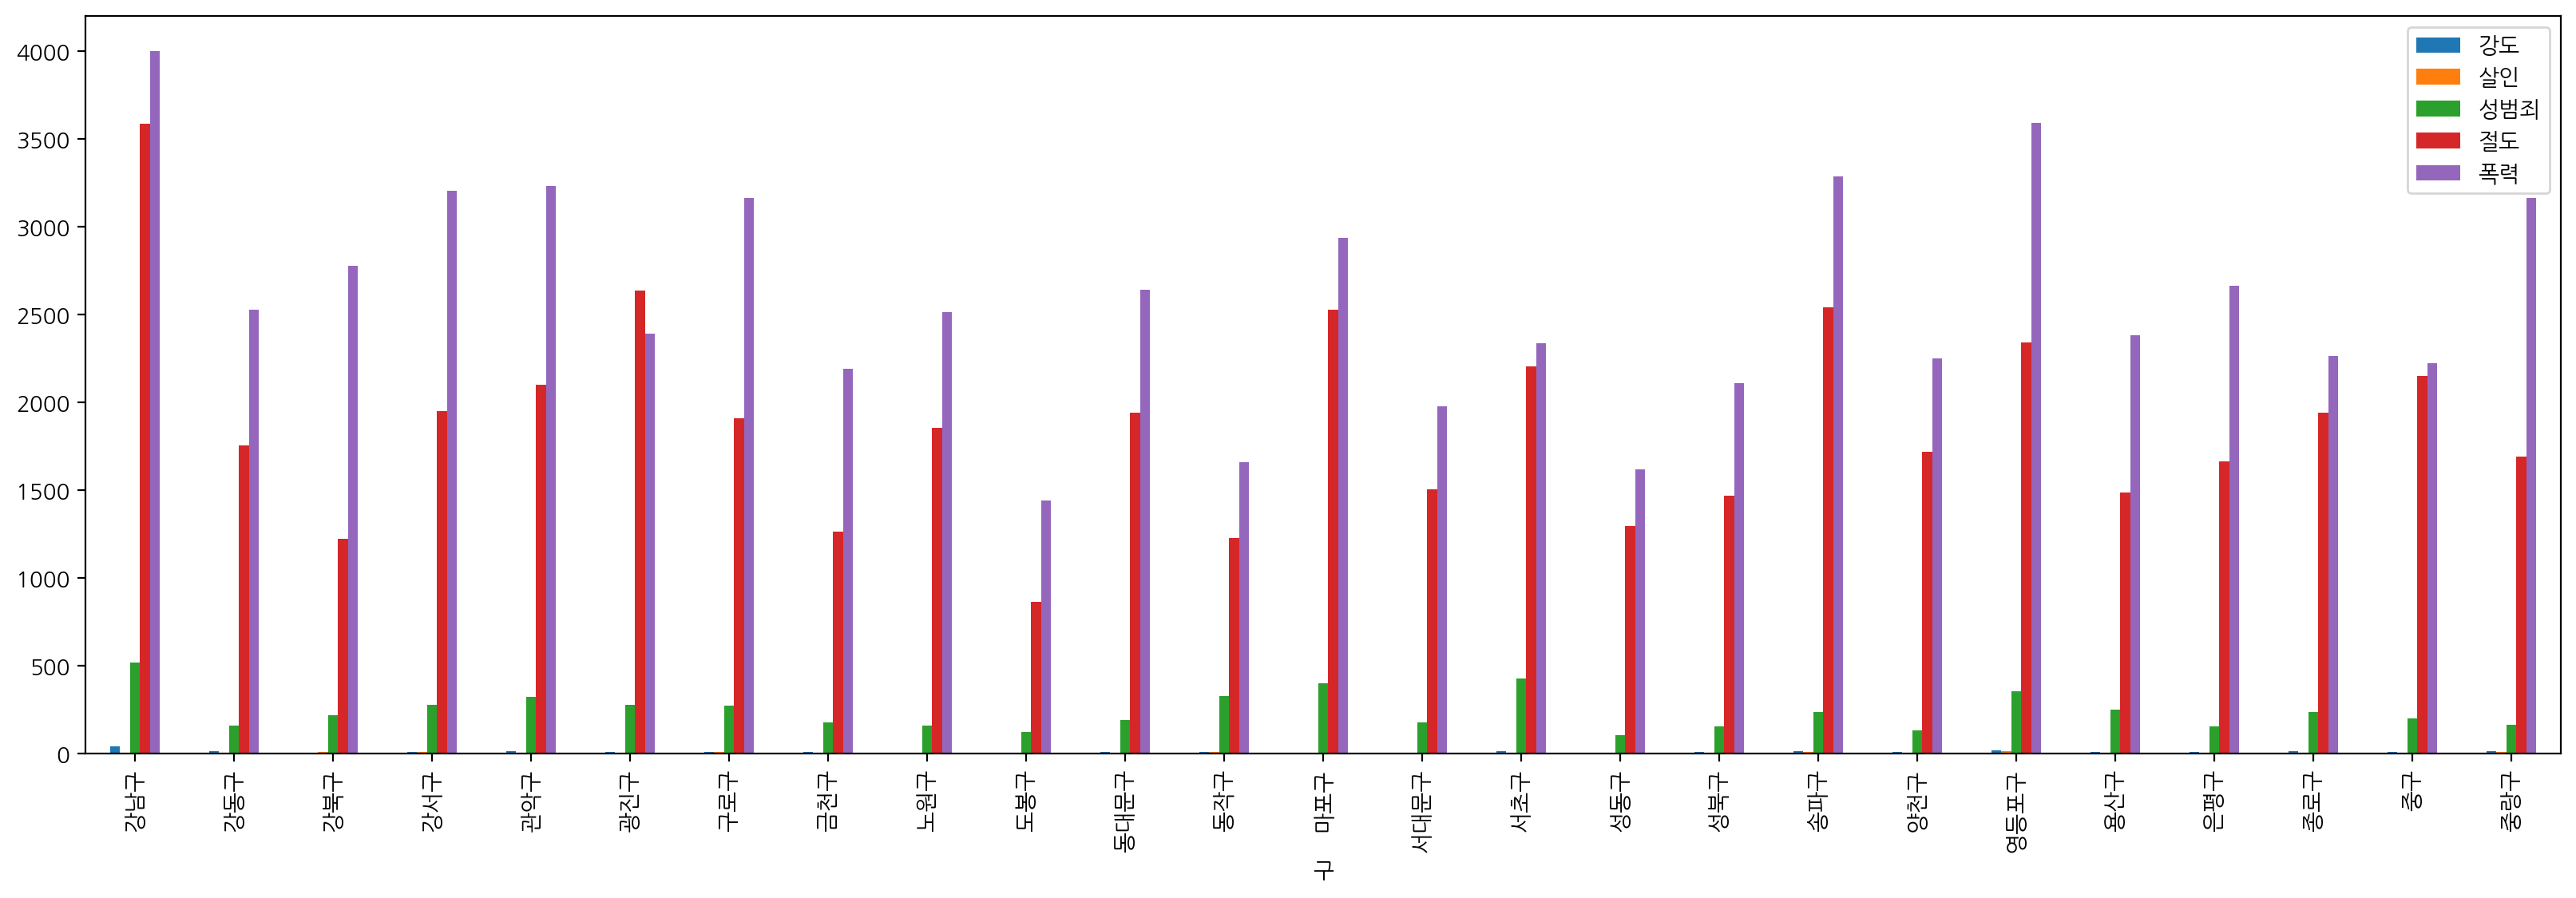

In [131]:
crime_gu[crime_gu.columns[:5]].plot(kind ='bar',figsize =(20,6));

In [219]:
crime_gu_norm = crime_gu[crime_gu.columns[:5]] / crime_gu[crime_gu.columns[:5]].max()

In [220]:
# 강도 살인이 잘 안보인다

In [221]:
crime_gu_norm[arrest_rate] =crime_gu[arrest_rate]
crime_gu_norm.head(1)

,강도,살인,성범죄,절도,폭력,강도검거율,살인검거율,성범죄검거율,절도검거율,폭력검거율
구,,,,,,,,,,
강남구,1.0,0.384615,1.0,1.0,1.0,100.0,100.0,80.04,53.47,88.13


In [222]:
crime_gu_norm.head()

,강도,살인,성범죄,절도,폭력,강도검거율,살인검거율,성범죄검거율,절도검거율,폭력검거율
구,,,,,,,,,,
강남구,1.000000,0.384615,1.000000,1.000000,1.000000,100.00,100.00,80.04,53.47,88.13
강동구,0.358974,0.307692,0.310078,0.488988,0.632184,92.86,100.00,95.00,51.43,87.00
강북구,0.128205,0.538462,0.420543,0.340675,0.694153,80.00,85.71,73.27,54.99,89.34
강서구,0.256410,0.692308,0.532946,0.544187,0.800600,100.00,100.00,86.91,54.82,86.39
관악구,0.307692,0.461538,0.624031,0.586284,0.808346,83.33,100.00,81.99,44.56,83.68


In [223]:
crime_gu.loc['강남구','강도']

39.0

In [215]:
crime_gu_norm

,강도,살인,성범죄,절도,폭력,강도검거율,살인검거율,성범죄검거율,절도검거율,폭력검거율
구,,,,,,,,,,
강남구,1.000000,0.384615,1.000000,1.000000,1.000000,100.00,100.00,80.04,53.47,88.13
강동구,0.358974,0.307692,0.310078,0.488988,0.632184,92.86,100.00,95.00,51.43,87.00
강북구,0.128205,0.538462,0.420543,0.340675,0.694153,80.00,85.71,73.27,54.99,89.34
강서구,0.256410,0.692308,0.532946,0.544187,0.800600,100.00,100.00,86.91,54.82,86.39
관악구,0.307692,0.461538,0.624031,0.586284,0.808346,83.33,100.00,81.99,44.56,83.68
광진구,0.282051,0.307692,0.540698,0.734876,0.597701,54.55,100.00,83.87,40.10,84.07
구로구,0.256410,0.692308,0.529070,0.532478,0.790605,100.00,100.00,66.30,45.08,84.70
금천구,0.179487,0.461538,0.339147,0.352384,0.547976,100.00,100.00,81.71,51.74,88.74
노원구,0.153846,0.384615,0.308140,0.517703,0.628686,100.00,100.00,89.31,39.85,84.42


In [224]:
crime_gu.loc['강남구','강도'] / crime_gu['강도'].max()

1.0

In [225]:
crime_gu.loc['종로구','강도'] /crime_gu['강도'].max()

0.3076923076923077

In [226]:
crime_gu_norm.head()

,강도,살인,성범죄,절도,폭력,강도검거율,살인검거율,성범죄검거율,절도검거율,폭력검거율
구,,,,,,,,,,
강남구,1.000000,0.384615,1.000000,1.000000,1.000000,100.00,100.00,80.04,53.47,88.13
강동구,0.358974,0.307692,0.310078,0.488988,0.632184,92.86,100.00,95.00,51.43,87.00
강북구,0.128205,0.538462,0.420543,0.340675,0.694153,80.00,85.71,73.27,54.99,89.34
강서구,0.256410,0.692308,0.532946,0.544187,0.800600,100.00,100.00,86.91,54.82,86.39
관악구,0.307692,0.461538,0.624031,0.586284,0.808346,83.33,100.00,81.99,44.56,83.68


In [217]:
# 정규화 작업
# crime_gu_norm = crime_gu[crime_gu.columns[:5]]/crime_gu[crime_gu.columns[:5]].max()

In [227]:
occur_col = ['강도','살인','성범죄','절도','폭력']

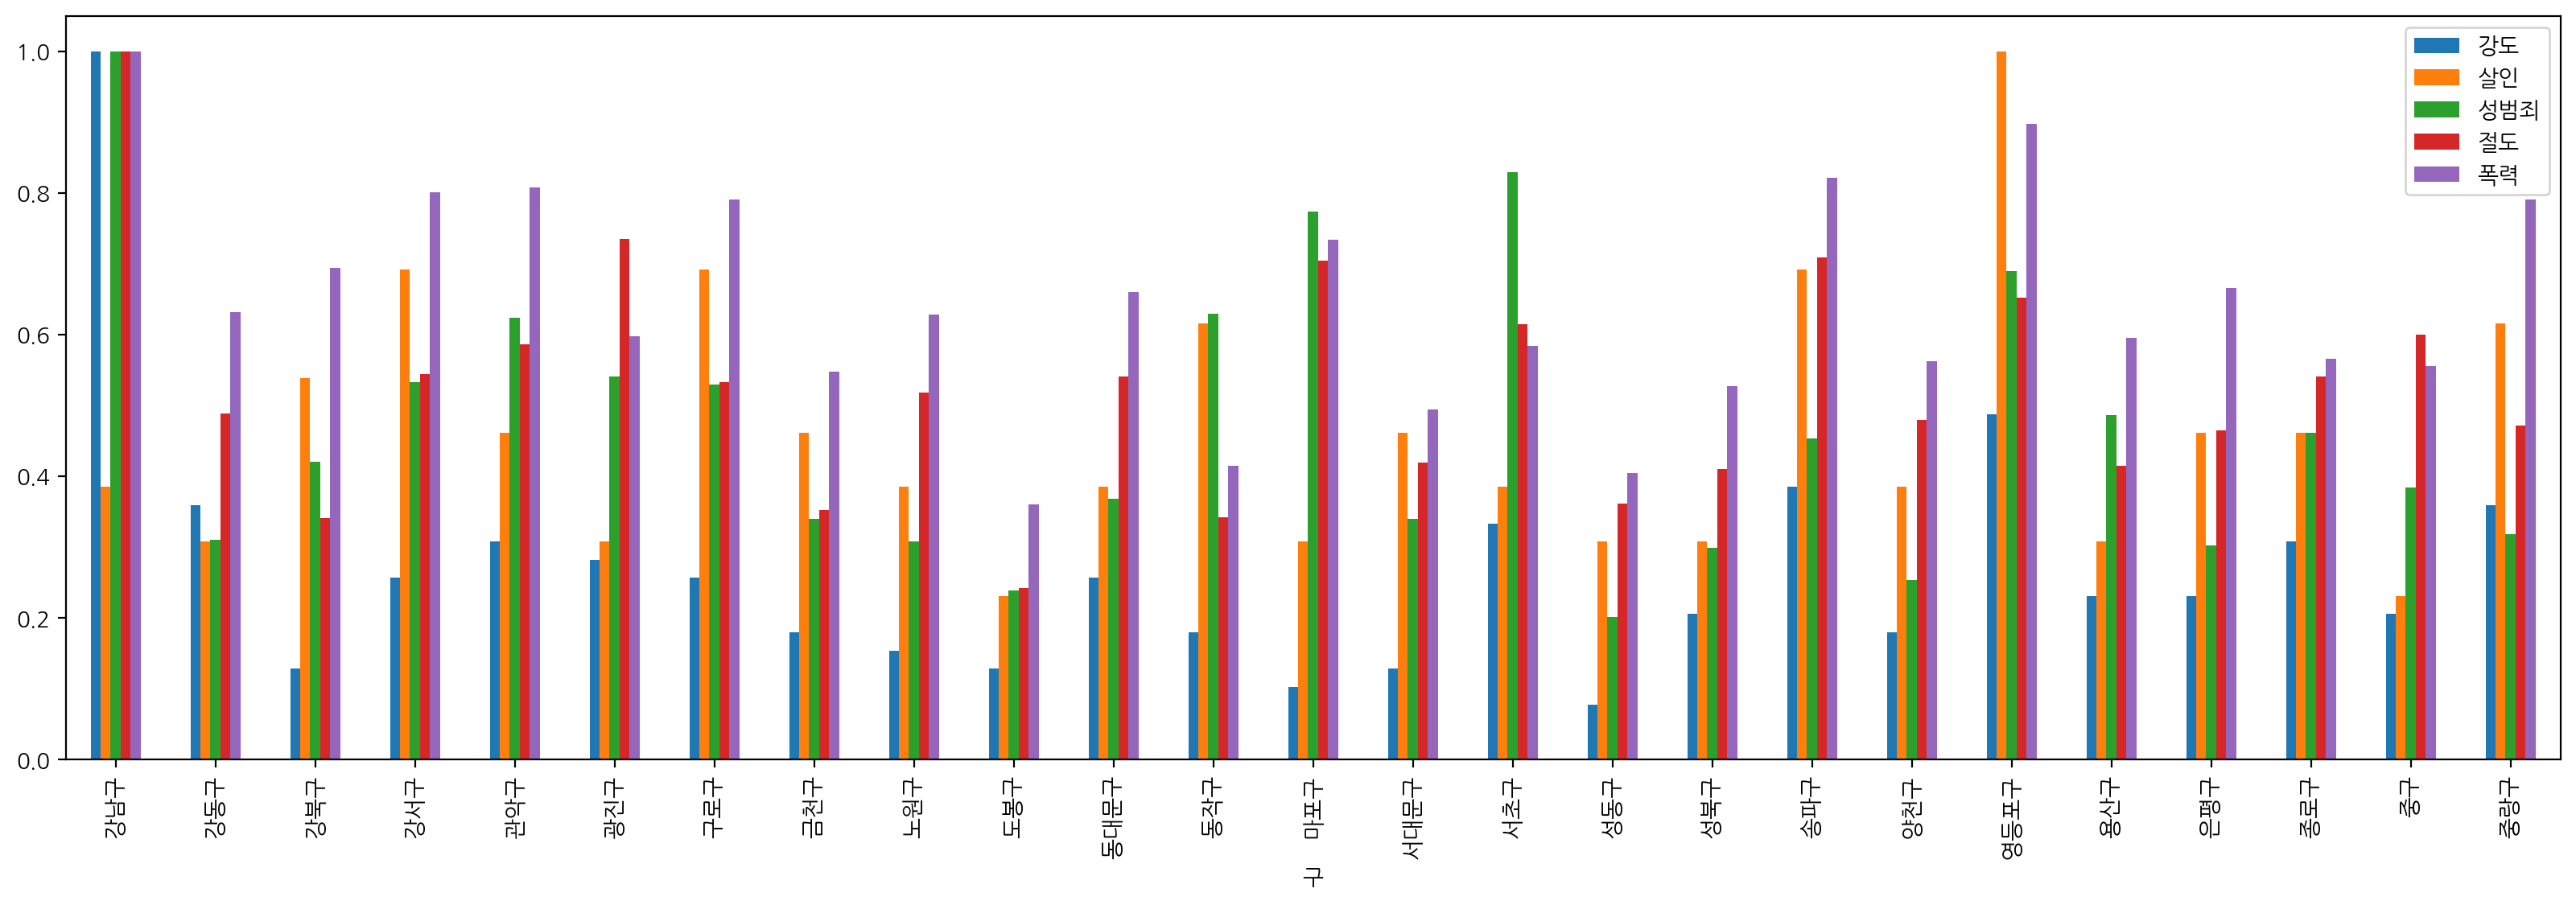

In [228]:
crime_gu_norm[occur_col].plot(kind ='bar',figsize=(20,6));

## 07.데이터 여섯번째 처리
- 범죄, 검거 평균 컬럼 생성

In [229]:
#### 1. 강남구에서 일어난 5대 범죄 선택

In [230]:
crime_gu_norm[occur_col].loc['강남구']

강도     1.000000
살인     0.384615
성범죄    1.000000
절도     1.000000
폭력     1.000000
Name: 강남구, dtype: float64

In [231]:
### 2 강남구애서 일어난 5대 범죄 총합

In [232]:
crime_gu_norm

,강도,살인,성범죄,절도,폭력,강도검거율,살인검거율,성범죄검거율,절도검거율,폭력검거율
구,,,,,,,,,,
강남구,1.000000,0.384615,1.000000,1.000000,1.000000,100.00,100.00,80.04,53.47,88.13
강동구,0.358974,0.307692,0.310078,0.488988,0.632184,92.86,100.00,95.00,51.43,87.00
강북구,0.128205,0.538462,0.420543,0.340675,0.694153,80.00,85.71,73.27,54.99,89.34
강서구,0.256410,0.692308,0.532946,0.544187,0.800600,100.00,100.00,86.91,54.82,86.39
관악구,0.307692,0.461538,0.624031,0.586284,0.808346,83.33,100.00,81.99,44.56,83.68
광진구,0.282051,0.307692,0.540698,0.734876,0.597701,54.55,100.00,83.87,40.10,84.07
구로구,0.256410,0.692308,0.529070,0.532478,0.790605,100.00,100.00,66.30,45.08,84.70
금천구,0.179487,0.461538,0.339147,0.352384,0.547976,100.00,100.00,81.71,51.74,88.74
노원구,0.153846,0.384615,0.308140,0.517703,0.628686,100.00,100.00,89.31,39.85,84.42


In [233]:
crime_gu_norm[occur_col].loc['강남구'].sum()

4.384615384615385

In [234]:
####3. 5로 나눠 줍니다

In [235]:
crime_gu_norm[occur_col].loc['강남구'].sum() / 5

0.876923076923077

In [236]:
mean_test_df = crime_gu_norm[occur_col].head()

In [237]:
mean_test_df['강도']

구
강남구    1.000000
강동구    0.358974
강북구    0.128205
강서구    0.256410
관악구    0.307692
Name: 강도, dtype: float64

In [238]:
np.mean(crime_gu_norm[occur_col],axis = 1) # numpy axis =1 행 axis = 0 열

구
강남구     0.876923
강동구     0.419583
강북구     0.424407
강서구     0.565290
관악구     0.557578
광진구     0.492604
구로구     0.560174
금천구     0.376107
노원구     0.398598
도봉구     0.239769
동대문구    0.442051
동작구     0.436310
마포구     0.524477
서대문구    0.368331
서초구     0.549267
성동구     0.270404
성북구     0.349564
송파구     0.612240
양천구     0.371886
영등포구    0.745508
용산구     0.407142
은평구     0.424951
종로구     0.467356
중구      0.394995
중랑구     0.510844
dtype: float64

In [245]:
crime_gu_norm['범죄평균'] = np.mean(crime_gu_norm[occur_col],axis = 1)

In [246]:
crime_gu_norm

,강도,살인,성범죄,절도,폭력,강도검거율,살인검거율,성범죄검거율,절도검거율,폭력검거율,범죄평균,검거평균
구,,,,,,,,,,,,
강남구,1.000000,0.384615,1.000000,1.000000,1.000000,100.00,100.00,80.04,53.47,88.13,0.876923,84.328
강동구,0.358974,0.307692,0.310078,0.488988,0.632184,92.86,100.00,95.00,51.43,87.00,0.419583,85.258
강북구,0.128205,0.538462,0.420543,0.340675,0.694153,80.00,85.71,73.27,54.99,89.34,0.424407,76.662
강서구,0.256410,0.692308,0.532946,0.544187,0.800600,100.00,100.00,86.91,54.82,86.39,0.565290,85.624
관악구,0.307692,0.461538,0.624031,0.586284,0.808346,83.33,100.00,81.99,44.56,83.68,0.557578,78.712
광진구,0.282051,0.307692,0.540698,0.734876,0.597701,54.55,100.00,83.87,40.10,84.07,0.492604,72.518
구로구,0.256410,0.692308,0.529070,0.532478,0.790605,100.00,100.00,66.30,45.08,84.70,0.560174,79.216
금천구,0.179487,0.461538,0.339147,0.352384,0.547976,100.00,100.00,81.71,51.74,88.74,0.376107,84.438
노원구,0.153846,0.384615,0.308140,0.517703,0.628686,100.00,100.00,89.31,39.85,84.42,0.398598,82.716


In [247]:
crime_gu_norm['검거평균'] = np.mean(crime_gu_norm[arrest_rate],axis = 1)

In [248]:
crime_gu_norm

,강도,살인,성범죄,절도,폭력,강도검거율,살인검거율,성범죄검거율,절도검거율,폭력검거율,범죄평균,검거평균
구,,,,,,,,,,,,
강남구,1.000000,0.384615,1.000000,1.000000,1.000000,100.00,100.00,80.04,53.47,88.13,0.876923,84.328
강동구,0.358974,0.307692,0.310078,0.488988,0.632184,92.86,100.00,95.00,51.43,87.00,0.419583,85.258
강북구,0.128205,0.538462,0.420543,0.340675,0.694153,80.00,85.71,73.27,54.99,89.34,0.424407,76.662
강서구,0.256410,0.692308,0.532946,0.544187,0.800600,100.00,100.00,86.91,54.82,86.39,0.565290,85.624
관악구,0.307692,0.461538,0.624031,0.586284,0.808346,83.33,100.00,81.99,44.56,83.68,0.557578,78.712
광진구,0.282051,0.307692,0.540698,0.734876,0.597701,54.55,100.00,83.87,40.10,84.07,0.492604,72.518
구로구,0.256410,0.692308,0.529070,0.532478,0.790605,100.00,100.00,66.30,45.08,84.70,0.560174,79.216
금천구,0.179487,0.461538,0.339147,0.352384,0.547976,100.00,100.00,81.71,51.74,88.74,0.376107,84.438
노원구,0.153846,0.384615,0.308140,0.517703,0.628686,100.00,100.00,89.31,39.85,84.42,0.398598,82.716


In [249]:
crime_gu_norm.head()

,강도,살인,성범죄,절도,폭력,강도검거율,살인검거율,성범죄검거율,절도검거율,폭력검거율,범죄평균,검거평균
구,,,,,,,,,,,,
강남구,1.000000,0.384615,1.000000,1.000000,1.000000,100.00,100.00,80.04,53.47,88.13,0.876923,84.328
강동구,0.358974,0.307692,0.310078,0.488988,0.632184,92.86,100.00,95.00,51.43,87.00,0.419583,85.258
강북구,0.128205,0.538462,0.420543,0.340675,0.694153,80.00,85.71,73.27,54.99,89.34,0.424407,76.662
강서구,0.256410,0.692308,0.532946,0.544187,0.800600,100.00,100.00,86.91,54.82,86.39,0.565290,85.624
관악구,0.307692,0.461538,0.624031,0.586284,0.808346,83.33,100.00,81.99,44.56,83.68,0.557578,78.712


In [250]:
# 범죄 평균치로 정렬했을때, 서울에서 가장 범죄가 많이 일어나는 구는?
crime_gu_norm['검거평균'].sort_values(ascending = False).head()

구
도봉구     89.204
성동구     86.222
동대문구    85.668
강서구     85.624
중랑구     85.376
Name: 검거평균, dtype: float64

In [251]:
a = crime_gu_norm['검거평균'].sort_values(ascending = False).head() # 코드를 봐도 잘 모르겠으면 타입을 보고 판단해봐라 이건 series 이기 때문에 전체적인게 아닐것이다.
type(a)

pandas.core.series.Series

In [252]:
crime_gu_norm.sort_values(by='검거평균',ascending=False).head() # 이건 코드를 보면 데이터 프레임이다 즉 전체적으로 나오는 것이다. 주의 깊게 생각해보자

,강도,살인,성범죄,절도,폭력,강도검거율,살인검거율,성범죄검거율,절도검거율,폭력검거율,범죄평균,검거평균
구,,,,,,,,,,,,
도봉구,0.128205,0.230769,0.238372,0.241427,0.360070,100.0,100.0,98.37,56.81,90.84,0.239769,89.204
성동구,0.076923,0.307692,0.201550,0.361305,0.404548,100.0,100.0,75.00,69.14,86.97,0.270404,86.222
동대문구,0.256410,0.384615,0.368217,0.540842,0.660170,100.0,100.0,83.16,55.21,89.97,0.442051,85.668
강서구,0.256410,0.692308,0.532946,0.544187,0.800600,100.0,100.0,86.91,54.82,86.39,0.565290,85.624
중랑구,0.358974,0.615385,0.317829,0.471425,0.790605,100.0,87.5,91.46,62.21,85.71,0.510844,85.376


In [253]:
b = crime_gu_norm.sort_values(by='검거평균',ascending=False).head()
type(b)

pandas.core.frame.DataFrame

In [256]:
# 검거 평균치로 정렬했을때, 서울시에서 범죄 검거율이 가장 높은 구는 어디?

In [257]:
# 데이터 저장
crime_gu_norm.to_csv('../data/crime_gu_norm_2016.csv',encoding = 'utf-8')

In [258]:
# 데이터 불러오기
new_df =pd.read_csv('../data/crime_gu_norm_2016.csv', index_col=0) # 인덱스를 불러오게 된다.
new_df.head(2)

,강도,살인,성범죄,절도,폭력,강도검거율,살인검거율,성범죄검거율,절도검거율,폭력검거율,범죄평균,검거평균
구,,,,,,,,,,,,
강남구,1.000000,0.384615,1.000000,1.000000,1.000000,100.00,100.0,80.04,53.47,88.13,0.876923,84.328
강동구,0.358974,0.307692,0.310078,0.488988,0.632184,92.86,100.0,95.00,51.43,87.00,0.419583,85.258


In [259]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
%matplotlib inline
%config lnlineBackend.figure_format = 'retina'

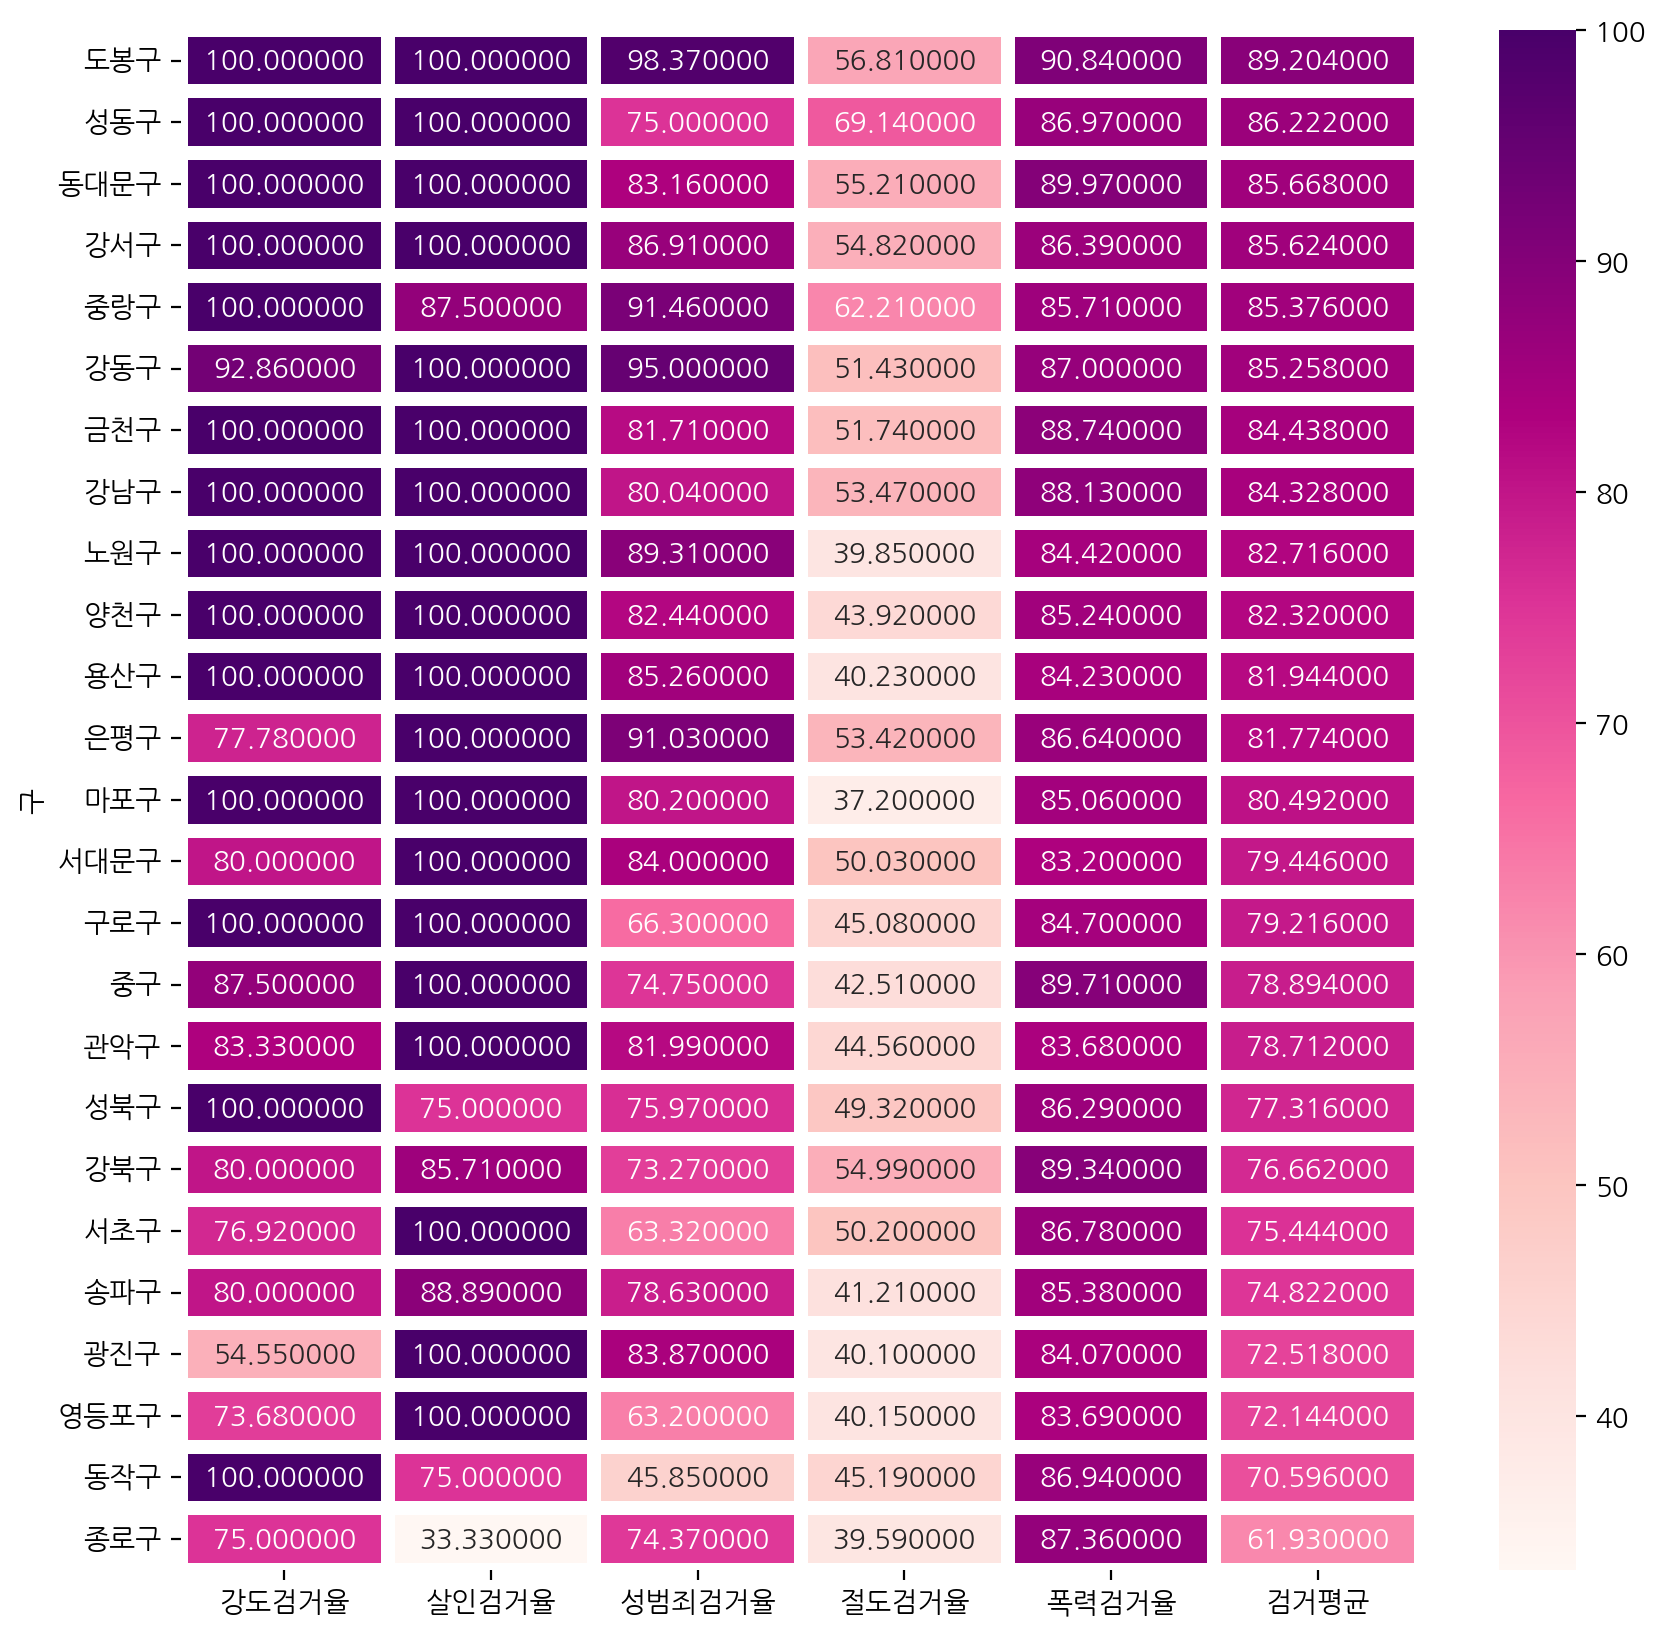

In [431]:
target_col =['강도검거율','살인검거율','성범죄검거율','절도검거율','폭력검거율','검거평균']   #7에서 배운것을 토대로 해보기
crime_gu_norm_sort = new_df.sort_values(by= '검거평균',ascending=False)
fig, ax =plt.subplots(figsize=(10,10))
sns.heatmap(crime_gu_norm_sort[target_col],annot =True, fmt ='f',linewidths = 5, cmap = 'RdPu')
plt.show();